<a href="https://colab.research.google.com/github/Murthy-Kolluru/modelthinking/blob/main/ModelThinkingCh2MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Generating Heads and Tails randomly
import random

def generate_sequence(times):
    for _ in range(times):
        for _ in range(10):  # Generating 10 random numbers each time
            rand_num = random.random()  # Generates a random number between 0 and 1
            if rand_num <= 0.5:
                print('H', end=' ')
            else:
                print('T', end=' ')
        print()  # Print a new line for each sequence

# Specify the number of times to generate the sequence
generate_sequence(3)  # Change this number to generate the sequence multiple times

T T T H T H H T T T 
T T T H H T T H H T 
H T T H H H H T T T 


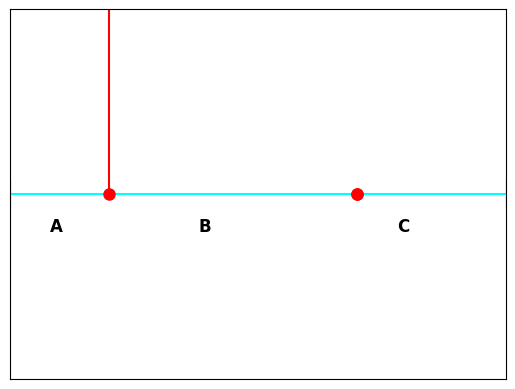

In [ ]:
#Plotting the distribution graph
import matplotlib.pyplot as plt

def draw_unit_line():
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plotting the unit line
  ax.plot([0, 1], [0, 0], marker='|', markersize=20, color='cyan')  # Plotting a line from (0,0) to (1,0) with a marker '|'

    # Markers at 0.2 and 0.7
    ax.plot([0.2, 0.2], [0.7, 0], marker='o', markersize=8, color='red')  # Marker at 0.2
    ax.plot([0.7, 0.7], [0, 0], marker='o', markersize=8, color='red')  # Marker at 0.7

    # Regions A, B, and C
    ax.text(0.08, -0.02, 'A', fontsize=12, weight='bold')  # Label for region A
    ax.text(0.38, -0.02, 'B', fontsize=12, weight='bold')  # Label for region B
    ax.text(0.78, -0.02, 'C', fontsize=12, weight='bold')  # Label for region C

    # Set x-axis and y-axis limits
    ax.set_xlim([0, 1])
    ax.set_ylim([-0.1, 0.1])  # Adjust the y-axis for marker visibility

    # Remove ticks from the plot
    ax.set_xticks([])
    ax.set_yticks([])

    # Show the plot
    plt.show()

# Call the function to draw the line with markers and regions
draw_unit_line()


In [ ]:
#Generating grading distribution
import random

def generate_sequences(num_sequences):
    for _ in range(num_sequences):
        sequence = []
        for _ in range(10):
            rand_num = random.random()  # Generates a random number between 0 and 1

            if rand_num < 0.2:
                sequence.append('A')
            elif 0.2 <= rand_num < 0.7:
                sequence.append('B')
            else:
                sequence.append('C')
        print(" ".join(sequence))

# Get the number of sequences from the user
num = int(input("Enter the number of sequences to generate: "))

# Generate the specified number of sequences
generate_sequences(num)


Enter the number of sequences to generate: 3
A C C A B C C A C B
A C B A B C B A A C
B B B C C B B B A C


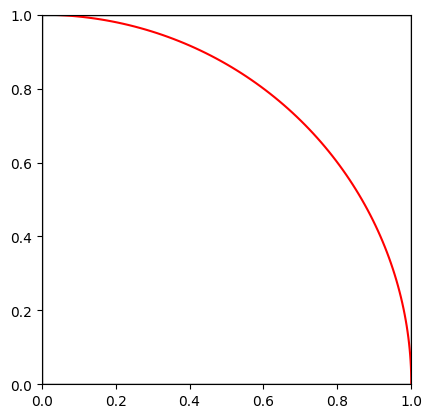

In [ ]:
#Circle within a square
import matplotlib.pyplot as plt
import numpy as np

# Square
square_side = 1
square = plt.Rectangle((0, 0), square_side, square_side, fill=None)

# Circle (quarter circle)
theta = np.linspace(0, np.pi / 2, 100)  # Generating angles from 0 to pi/2 for a quarter circle
x = np.cos(theta)
y = np.sin(theta)

# Create a figure and axis
fig, ax = plt.subplots()

# Add square and circle to the plot
ax.add_patch(square)
ax.plot(x, y, color='r')

# Set aspect to equal, so the plot looks like a square
ax.set_aspect('equal')

# Set x-axis and y-axis limits
ax.set_xlim([0, 1])  # Adjust x-axis limits for better visualization
ax.set_ylim([0, 1])  # Adjust y-axis limits for better visualization

# Show the plot
plt.show()


In [ ]:
#Estimating Pi
import random

def estimate_pi(num_points):
    darts_within = 0  # Counter for points within the quarter circle

    for _ in range(num_points):
        x = random.uniform(0, 1)  # Random x-coordinate between 0 and 1
        y = random.uniform(0, 1)  # Random y-coordinate between 0 and 1

        if x**2 + y**2 <= 1:  # Check if the point is within the quarter circle
            darts_within += 1

    pi_estimate = (darts_within / num_points) * 4  # Estimating pi using the ratio of points within to total points
    return pi_estimate

# List of numbers of points to generate
num_points_list = [10, 100, 1000, 10000, 100000]

# Calculate pi estimate for each number of points and print the result
for num_points in num_points_list:
    pi_estimate = estimate_pi(num_points)
    print(f"Points: {num_points}, Pi Estimate: {pi_estimate}")


Points: 10, Pi Estimate: 3.2
Points: 100, Pi Estimate: 3.32
Points: 1000, Pi Estimate: 3.212
Points: 10000, Pi Estimate: 3.148
Points: 100000, Pi Estimate: 3.13976


In [ ]:
#Probability of outcomes
import random

def calculate_probability(num_throws, sides_first_die, sides_second_die):
    outcomes_favorable = 0  # Counter for outcomes where first die > second die

    for _ in range(num_throws):
        first_die = random.randint(1, sides_first_die)  # Rolling the first die
        second_die = random.randint(1, sides_second_die)  # Rolling the second die

        if first_die > second_die:
            outcomes_favorable += 1

    probability = outcomes_favorable / num_throws
    return probability

# Define the number of throws and sides for each die
num_throws_list = [1000, 10000, 100000]
sides_first_die = 4
sides_second_die = 6

# Calculate probability for each number of throws and print the result
for num_throws in num_throws_list:
    prob = calculate_probability(num_throws, sides_first_die, sides_second_die)
    print(f"Number of throws: {num_throws}, Probability: {prob}")


Number of throws: 1000, Probability: 0.266
Number of throws: 10000, Probability: 0.2456
Number of throws: 100000, Probability: 0.25127


In [ ]:
#Biased Dice
import random

def biased_die_roll(probabilities):
    rand_num = random.random()  # Generate a random number between 0 and 1

    # Calculate the outcome based on probabilities
    cumulative_prob = 0
    for outcome, prob in probabilities.items():
        cumulative_prob += prob
        if rand_num < cumulative_prob:
            return outcome

def calculate_probability(num_throws, probabilities, sides_second_die):
    outcomes_favorable = 0  # Counter for outcomes where first die > second die

    for _ in range(num_throws):
        first_die = biased_die_roll(probabilities)  # Rolling the biased first die
        second_die = random.randint(1, sides_second_die)  # Rolling the second die

        if first_die > second_die:
            outcomes_favorable += 1

    probability = outcomes_favorable / num_throws
    return probability

# Define the number of throws and probabilities for the biased die
num_throws_list = [1000, 10000, 100000]
sides_second_die = 6
probabilities_first_die = {1: 0.6, 2: 0.3, 3: 0.08, 4: 0.02}

# Calculate probability for each number of throws and print the result
for num_throws in num_throws_list:
    prob = calculate_probability(num_throws, probabilities_first_die, sides_second_die)
    print(f"Number of throws: {num_throws}, Probability: {prob}")


Number of throws: 1000, Probability: 0.099
Number of throws: 10000, Probability: 0.0868
Number of throws: 100000, Probability: 0.08889


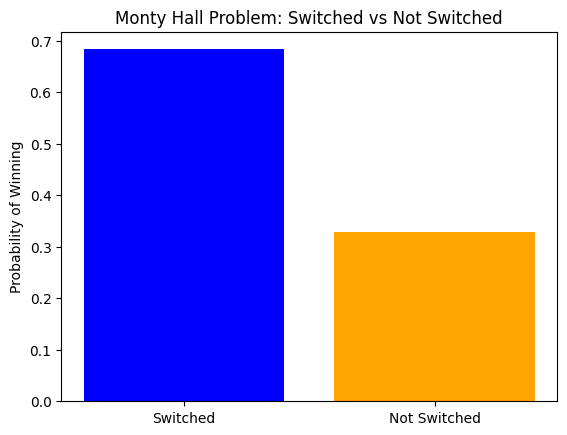

In [ ]:
#Montyhall
import random
import matplotlib.pyplot as plt

def monty_hall_simulation(num_trials, switch_choice=True):
    wins = 0

    for _ in range(num_trials):
        doors = [0, 0, 1]  # 0 represents a goat, 1 represents the prize
        random.shuffle(doors)  # Shuffle the doors randomly

        contestant_choice = random.randint(0, 2)  # Contestant's initial choice

        # Monty opens one of the remaining doors revealing a goat
        remaining_doors = [i for i in range(3) if i != contestant_choice]
        monty_opens = random.choice([door for door in remaining_doors if doors[door] == 0])

        # If switch_choice is True, contestant switches their choice
        if switch_choice:
            contestant_choice = [door for door in range(3) if door not in [contestant_choice, monty_opens]][0]

        # Check if the contestant wins
        if doors[contestant_choice] == 1:
            wins += 1

    return wins / num_trials

# Number of trials for the simulation
num_trials = 1000

# Simulate Monty Hall problem with switching and without switching
prob_switch = monty_hall_simulation(num_trials, switch_choice=True)
prob_no_switch = monty_hall_simulation(num_trials, switch_choice=False)

# Create a bar plot to compare probabilities
labels = ['Switched', 'Not Switched']
probabilities = [prob_switch, prob_no_switch]

plt.bar(labels, probabilities, color=['blue', 'orange'])
plt.ylabel('Probability of Winning')
plt.title('Monty Hall Problem: Switched vs Not Switched')

# Show the plot
plt.show()


In [ ]:
#8 male babies in a row
import random

def simulate_all_male_babies(num_iterations, num_women, num_babies, prob_male):
    all_male_count = 0

    for _ in range(num_iterations):
        for _ in range(num_women):
            babies = [random.random() < prob_male for _ in range(num_babies)]
            if all(babies):
                all_male_count += 1
                break  # Exit inner loop if all babies are male for a woman

    probability_all_male = all_male_count / num_iterations
    return probability_all_male

# Parameters
num_iterations = 10000
num_women = 14000  # 14,000 women
num_babies = 8
prob_male = 0.5

# Simulate and calculate probability of all male babies
probability_all_male = simulate_all_male_babies(num_iterations, num_women, num_babies, prob_male)
print(f"Probability of any woman having all male babies: {probability_all_male}")


Probability of any woman having all male babies: 1.0


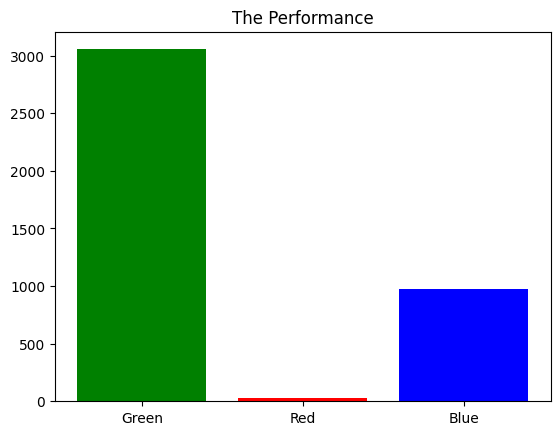

Red Median = 30.611001599999994
Green Median = 3054.1425938596003
Blue Median = 970.2990000000001


In [ ]:
#Investing in 1
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define the Returns matrix
Returns = np.array([
    [0.8, 0.06, 0.9],
    [0.9, 0.2, 1],
    [1.05, 1, 1],
    [1.1, 3, 1],
    [1.2, 3, 1],
    [1.4, 3, 1.1]
])

# Initial investments
Green = Red = Blue = 1000

# Arrays to store outcomes
GreenOutcome = np.zeros(10000)
RedOutcome = np.zeros(10000)
BlueOutcome = np.zeros(10000)

# Simulate 10,000 iterations
for sims in range(10000):

    # Simulate 20 years
    for _ in range(20):
        # Randomly select an outcome
        Outcome = np.random.choice(range(6), 1)[0]

        # Update investments
        Green *= Returns[Outcome, 0]
        Red *= Returns[Outcome, 1]
        Blue *= Returns[Outcome, 2]

    # Store outcomes
    GreenOutcome[sims] = Green
    RedOutcome[sims] = Red
    BlueOutcome[sims] = Blue

    # Reinitialize for the next iteration
    Green = Red = Blue = 1000

# Calculate medians
AverageGreen = np.median(GreenOutcome)
AverageRed = np.median(RedOutcome)
AverageBlue = np.median(BlueOutcome)

# Plot bar chart
labels = ['Green', 'Red', 'Blue']
plt.bar(labels, [AverageGreen, AverageRed, AverageBlue], color=['green', 'red', 'blue'])
plt.title('The Performance')
plt.show()

# Print median and mean for RedOutcome
print(f"Red Median = {AverageRed}")
print(f"Green Median = {AverageGreen}")
print(f"Blue Median = {AverageBlue}")


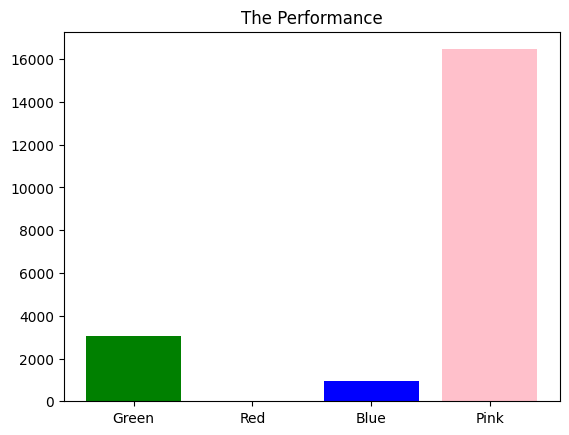

In [ ]:
#Portfolio
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define the Returns matrix
Returns = np.array([
    [0.8, 0.06, 0.9],
    [0.9, 0.2, 1],
    [1.05, 1, 1],
    [1.1, 3, 1],
    [1.2, 3, 1],
    [1.4, 3, 1.1]
])

# Initial investments
Green = Red = Blue = Pink = 1000

# Arrays to store outcomes
GreenOutcome = np.zeros(1000)
RedOutcome = np.zeros(1000)
BlueOutcome = np.zeros(1000)
PinkOutcome = np.zeros(1000)

# Simulate 1,000 iterations
for j in range(1000):

    # Simulate 20 years
    for i in range(20):
        # Randomly select an outcome
        Outcome = np.random.choice(range(6), 1)[0]

        # Update investments for Green, Red, and Blue
        Green *= Returns[Outcome, 0]
        Red *= Returns[Outcome, 1]
        Blue *= Returns[Outcome, 2]

        # Update investment for Pink
        Pink = (Returns[Outcome, 0] * Pink / 2) + (Returns[Outcome, 1] * Pink / 2)

    # Store outcomes
    GreenOutcome[j] = Green
    RedOutcome[j] = Red
    BlueOutcome[j] = Blue
    PinkOutcome[j] = Pink

    # Reinitialize for the next iteration
    Green = Red = Blue = Pink = 1000

# Calculate medians
AverageGreen = np.median(GreenOutcome)
AverageRed = np.median(RedOutcome)
AverageBlue = np.median(BlueOutcome)
AveragePink = np.median(PinkOutcome)

# Plot bar chart
labels = ['Green', 'Red', 'Blue', 'Pink']
plt.bar(labels, [AverageGreen, AverageRed, AverageBlue, AveragePink], color=['green', 'red', 'blue', 'pink'])
plt.title('The Performance')
plt.show()


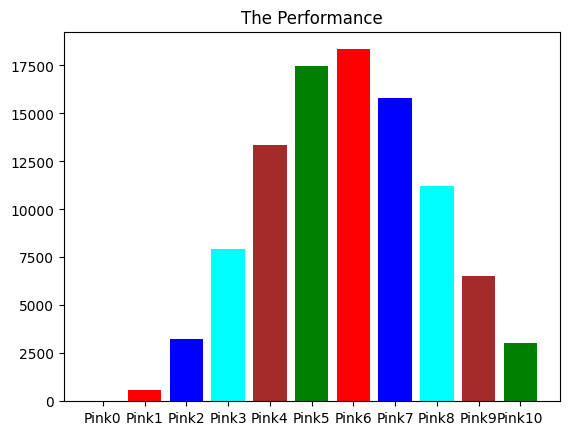

Pink0 Median = 30.611001599999994
Pink1 Median = 587.1839160850913
Pink2 Median = 3244.4474223579596
Pink3 Median = 7951.811853387457
Pink4 Median = 13367.229947522332
Pink5 Median = 17481.987564202882
Pink6 Median = 18341.07513625789
Pink7 Median = 15798.239159334846
Pink8 Median = 11218.255331887118
Pink9 Median = 6546.097507881448
Pink10 Median = 3054.1425938596003


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define the Returns matrix
Returns = np.array([
    [0.8, 0.06, 0.9],
    [0.9, 0.2, 1],
    [1.05, 1, 1],
    [1.1, 3, 1],
    [1.2, 3, 1],
    [1.4, 3, 1.1]
])

# Initial investments
#Pink = 1000
Pink_0,Pink_1,Pink_2,Pink_3,Pink_4,Pink_5,Pink_6,Pink_7,Pink_8,Pink_9,Pink_10=1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000

# Arrays to store outcomes
Pink_0_Outcomes = np.zeros(10000)
Pink_1_Outcomes = np.zeros(10000)
Pink_2_Outcomes = np.zeros(10000)
Pink_3_Outcomes = np.zeros(10000)
Pink_4_Outcomes = np.zeros(10000)
Pink_5_Outcomes = np.zeros(10000)
Pink_6_Outcomes = np.zeros(10000)
Pink_7_Outcomes = np.zeros(10000)
Pink_8_Outcomes = np.zeros(10000)
Pink_9_Outcomes= np.zeros(10000)
Pink_10_Outcomes = np.zeros(10000)

#RedOutcome = np.zeros(10000)
#BlueOutcome = np.zeros(10000)

# Simulate 10,000 iterations
for sims in range(10000):

    # Simulate 20 years
    for _ in range(20):
        # Randomly select an outcome
        Outcome = np.random.choice(range(6), 1)[0]

        # Update investments
        Pink_0 = (Returns[Outcome, 0] * Pink_0*0) + (Returns[Outcome, 1] * Pink_0*1) #Green *= Returns[Outcome, 0]
        Pink_1 = (Returns[Outcome, 0] * Pink_1*0.1) + (Returns[Outcome, 1] * Pink_1*0.9)
        Pink_2 = (Returns[Outcome, 0] * Pink_2*0.2) + (Returns[Outcome, 1] * Pink_2*0.8)
        Pink_3 = (Returns[Outcome, 0] * Pink_3*0.3) + (Returns[Outcome, 1] * Pink_3*0.7)
        Pink_4 = (Returns[Outcome, 0] * Pink_4*0.4) + (Returns[Outcome, 1] * Pink_4*0.6)
        Pink_5 = (Returns[Outcome, 0] * Pink_5*0.5) + (Returns[Outcome, 1] * Pink_5*0.5)
        Pink_6 = (Returns[Outcome, 0] * Pink_6*0.6) + (Returns[Outcome, 1] * Pink_6*0.4)
        Pink_7 = (Returns[Outcome, 0] * Pink_7*0.7) + (Returns[Outcome, 1] * Pink_7*0.3)
        Pink_8 = (Returns[Outcome, 0] * Pink_8*0.8) + (Returns[Outcome, 1] * Pink_8*0.2)
        Pink_9 = (Returns[Outcome, 0] * Pink_9*0.9) + (Returns[Outcome, 1] * Pink_9*0.1)
        Pink_10 = (Returns[Outcome, 0] * Pink_10*1.0) + (Returns[Outcome, 1] * Pink_10*0)

       #  Red *= Returns[Outcome, 1]
       # Blue *= Returns[Outcome, 2]

    # Store outcomes
    Pink_0_Outcomes[sims] = Pink_0
    Pink_1_Outcomes[sims] = Pink_1
    Pink_2_Outcomes[sims] = Pink_2
    Pink_3_Outcomes[sims] = Pink_3
    Pink_4_Outcomes[sims] = Pink_4
    Pink_5_Outcomes[sims] = Pink_5
    Pink_6_Outcomes[sims] = Pink_6
    Pink_7_Outcomes[sims] = Pink_7
    Pink_8_Outcomes[sims] = Pink_8
    Pink_9_Outcomes[sims] = Pink_9
    Pink_10_Outcomes[sims] = Pink_10

    # Reinitialize for the next iteration
    #Green = Red = Blue = 1000
    #Pink =1000
    Pink_0,Pink_1,Pink_2,Pink_3,Pink_4,Pink_5,Pink_6,Pink_7,Pink_8,Pink_9,Pink_10=1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


# Calculate medians
AveragePink0 = np.median(Pink_0_Outcomes)
AveragePink1 = np.median(Pink_1_Outcomes)
AveragePink2 = np.median(Pink_2_Outcomes)
AveragePink3 = np.median(Pink_3_Outcomes)
AveragePink4 = np.median(Pink_4_Outcomes)
AveragePink5 = np.median(Pink_5_Outcomes)
AveragePink6 = np.median(Pink_6_Outcomes)
AveragePink7 = np.median(Pink_7_Outcomes)
AveragePink8 = np.median(Pink_8_Outcomes)
AveragePink9 = np.median(Pink_9_Outcomes)
AveragePink10 = np.median(Pink_10_Outcomes)

# Plot bar chart
labels = ['Pink0', 'Pink1', 'Pink2','Pink3', 'Pink4', 'Pink5','Pink6', 'Pink7', 'Pink8','Pink9', 'Pink10']
plt.bar(labels, [AveragePink0, AveragePink1, AveragePink2,AveragePink3,AveragePink4,AveragePink5,AveragePink6,AveragePink7,AveragePink8,AveragePink9,AveragePink10], color=['green', 'red', 'blue','cyan','brown'])
plt.title('The Performance')
plt.show()

# Print median and mean for RedOutcome
# Print median and mean for RedOutcome
print(f"Pink0 Median = {AveragePink0}")
print(f"Pink1 Median = {AveragePink1}")
print(f"Pink2 Median = {AveragePink2}")
print(f"Pink3 Median = {AveragePink3}")
print(f"Pink4 Median = {AveragePink4}")
print(f"Pink5 Median = {AveragePink5}")
print(f"Pink6 Median = {AveragePink6}")
print(f"Pink7 Median = {AveragePink7}")
print(f"Pink8 Median = {AveragePink8}")
print(f"Pink9 Median = {AveragePink9}")
print(f"Pink10 Median = {AveragePink10}")


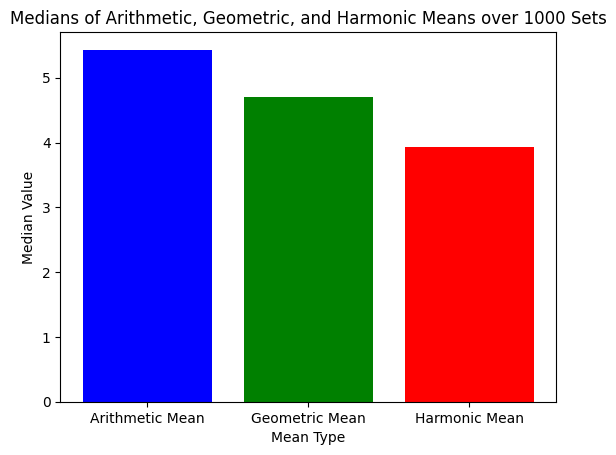

In [ ]:
#Patterns of AM, GM and HM
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of sets and numbers in each set
num_sets = 1000
num_numbers = 10

# Arrays to store means for each set
arithmetic_means = np.zeros(num_sets)
geometric_means = np.zeros(num_sets)
harmonic_means = np.zeros(num_sets)

# Generate random numbers, compute means for each set
for i in range(num_sets):
    # Generate 10 random numbers between 1 and 10
    random_numbers = np.random.uniform(1, 10, num_numbers)

    # Compute means
    arithmetic_means[i] = np.mean(random_numbers)
    geometric_means[i] = np.exp(np.mean(np.log(random_numbers)))
    harmonic_means[i] = len(random_numbers) / np.sum(1 / random_numbers)

# Compute medians
median_arithmetic_mean = np.median(arithmetic_means)
median_geometric_mean = np.median(geometric_means)
median_harmonic_mean = np.median(harmonic_means)

# Plot the medians
labels = ['Arithmetic Mean', 'Geometric Mean', 'Harmonic Mean']
medians = [median_arithmetic_mean, median_geometric_mean, median_harmonic_mean]

plt.bar(labels, medians, color=['blue', 'green', 'red'])
plt.xlabel('Mean Type')
plt.ylabel('Median Value')
plt.title('Medians of Arithmetic, Geometric, and Harmonic Means over 1000 Sets')
plt.show()


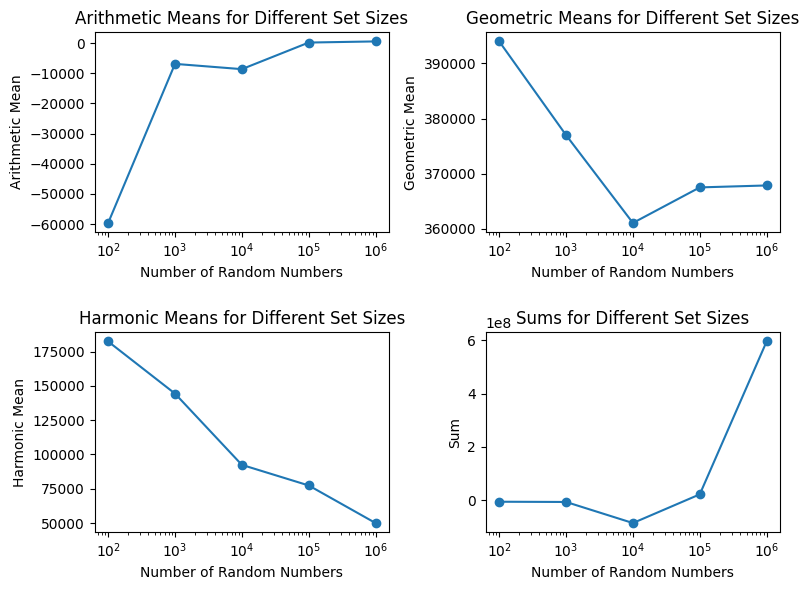

In [ ]:
#Noise cancellation
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of random numbers for each set
n_values = [100, 1000, 10000, 100000, 1000000]

# Arrays to store means and sums for each set size
arithmetic_means = []
geometric_means = []
harmonic_means = []
sums = []

# Generate random numbers and compute means and sums for each set size
for n in n_values:
    # Generate n random numbers between -1e6 and 1e6
    random_numbers = np.random.uniform(-1e6, 1e6, n)

    # Compute means
    arithmetic_means.append(np.mean(random_numbers))
    geometric_means.append(np.exp(np.mean(np.log(np.abs(random_numbers)))))
    harmonic_means.append(n / np.sum(1 / np.abs(random_numbers)))

    # Compute sum
    sums.append(np.sum(random_numbers))

# Plot arithmetic means
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.plot(n_values, arithmetic_means, marker='o')
plt.xscale('log')
plt.title('Arithmetic Means for Different Set Sizes')
plt.xlabel('Number of Random Numbers')
plt.ylabel('Arithmetic Mean')

# Plot geometric means
plt.subplot(2, 2, 2)
plt.plot(n_values, geometric_means, marker='o')
plt.xscale('log')
plt.title('Geometric Means for Different Set Sizes')
plt.xlabel('Number of Random Numbers')
plt.ylabel('Geometric Mean')

# Plot harmonic means
plt.subplot(2, 2, 3)
plt.plot(n_values, harmonic_means, marker='o')
plt.xscale('log')
plt.title('Harmonic Means for Different Set Sizes')
plt.xlabel('Number of Random Numbers')
plt.ylabel('Harmonic Mean')

# Plot sums
plt.subplot(2, 2, 4)
plt.plot(n_values, sums, marker='o')
plt.xscale('log')
plt.title('Sums for Different Set Sizes')
plt.xlabel('Number of Random Numbers')
plt.ylabel('Sum')

plt.tight_layout()
plt.show()



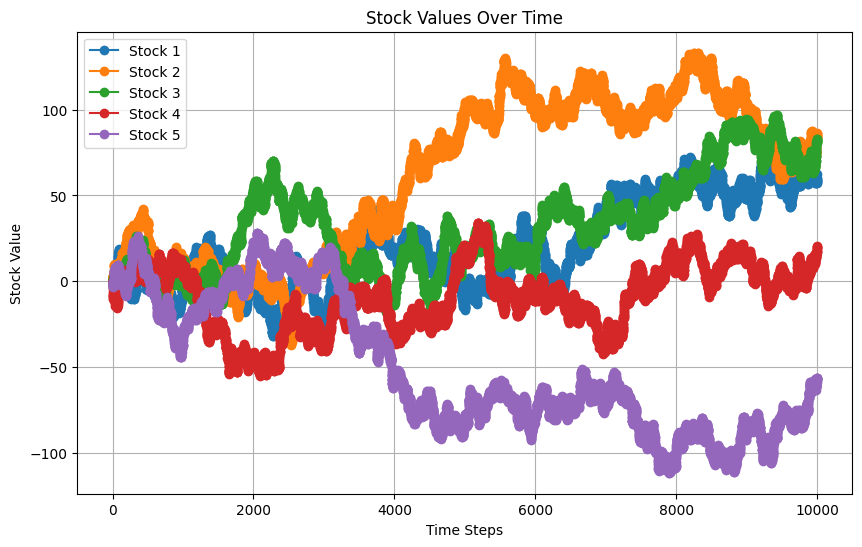

In [ ]:
#Walstreet
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(47)

# Number of time steps
time_steps = 10000

# Number of stocks
num_stocks = 5

# Initialize stocks at zero
stocks = np.zeros((num_stocks, time_steps + 1))

# Generate stock values over time
for t in range(1, time_steps + 1):
    # Generate random numbers from standard normal distribution for each stock
    random_changes = np.random.normal(size=num_stocks)

    # Update stock values
    stocks[:, t] = stocks[:, t - 1] + random_changes

# Plot all 5 stocks on the same plot
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(range(time_steps + 1), stock, marker='o', linestyle='-')

plt.title('Stock Values Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Stock Value')
plt.legend(['Stock 1', 'Stock 2', 'Stock 3', 'Stock 4', 'Stock 5'])
plt.grid(True)
plt.show()
